In [4]:
#데이터베이스 생성
import pandas as pd
import pymysql

data = pd.read_excel("./db_score.xlsx")

conn = pymysql.connect(host = "localhost", user = "root", password = "1234", charset='utf8')

curs = conn.cursor(pymysql.cursors.DictCursor)

#curs.execute("CREATE DATABASE hw5")

#주어진 액셀 파일을 mysql의 테이블로 구축

xl_file = './db_score.xlsx'
db_score = pd.read_excel(xl_file)

conn = pymysql.connect(host='localhost', user='root', password='1234', db='hw5')
curs = conn.cursor(pymysql.cursors.DictCursor)

drop_sql = """drop table if exists db_score """
curs.execute(drop_sql)
conn.commit()

import sqlalchemy
database_username = 'root'
database_password = '1234'
database_ip       = 'localhost'
database_name     = 'hw5'
database_connection = sqlalchemy.create_engine('mysql+pymysql://{0}:{1}@{2}/{3}'.
                                               format(database_username, database_password, 
                                                      database_ip, database_name))

db_score.to_sql(con=database_connection, name='db_score', if_exists='replace')

curs.close()
conn.close()

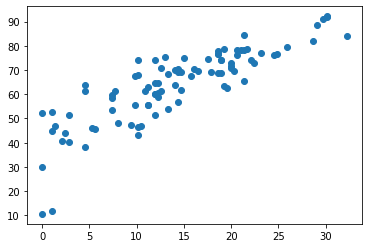

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import time
import pandas as pd
import pymysql

def load_dbscore_data():
    conn = pymysql.connect(host='localhost', user='root', password='1234', db='hw5')
    curs = conn.cursor(pymysql.cursors.DictCursor)
    
    sql = "select * from db_score"
    curs.execute(sql)
    
    data  = curs.fetchall()
    
    curs.close()
    conn.close()
    
    X = [ ( t['final'] ) for t in data ]
    X = np.array(X)
    
    y = [ (t['score']) for t in data]
    y = np.array(y)

    return X, y

X, y = load_dbscore_data()

plt.scatter(X, y) 
plt.show()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     228.6
Date:                Thu, 04 Nov 2021   Prob (F-statistic):           1.94e-26
Time:                        10:01:48   Log-Likelihood:                -322.30
No. Observations:                  92   AIC:                             648.6
Df Residuals:                      90   BIC:                             653.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         40.6247      1.766     23.009      0.0

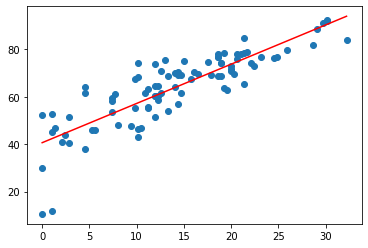

In [5]:
# y = mx + c
import statsmodels.api as sm

X_const = sm.add_constant(X)

model = sm.OLS(y, X_const)
ls = model.fit()

print(ls.summary())

ls_c = ls.params[0]
ls_m = ls.params[1]

m = 1.6553
c = 40.6247   

y_pred = m*X + c

plt.scatter(X, y) 
plt.plot([min(X), max(X)], [min(y_pred), max(y_pred)], color='red')
plt.show()

epoch 0: m_grad=-2010.578272, c_grad=-128.088261, m=2.010578, c=0.128088
epoch 1000: m_grad=0.642195, c_grad=-11.794960, m=3.037510, c=15.237679
epoch 2000: m_grad=0.403588, c_grad=-7.412555, m=2.523940, c=24.670218
epoch 3000: m_grad=0.253635, c_grad=-4.658428, m=2.201187, c=30.598107
epoch 4000: m_grad=0.159397, c_grad=-2.927594, m=1.998352, c=34.323495
epoch 5000: m_grad=0.100174, c_grad=-1.839849, m=1.870881, c=36.664719
epoch 6000: m_grad=0.062954, c_grad=-1.156255, m=1.790771, c=38.136064
epoch 7000: m_grad=0.039564, c_grad=-0.726650, m=1.740426, c=39.060732
epoch 8000: m_grad=0.024864, c_grad=-0.456664, m=1.708787, c=39.641841
epoch 9000: m_grad=0.015626, c_grad=-0.286991, m=1.688903, c=40.007039
epoch 10000: m_grad=0.009820, c_grad=-0.180360, m=1.676407, c=40.236548
epoch 11000: m_grad=0.006171, c_grad=-0.113347, m=1.668554, c=40.380783
epoch 12000: m_grad=0.003878, c_grad=-0.071233, m=1.663618, c=40.471428
epoch 13000: m_grad=0.002437, c_grad=-0.044767, m=1.660517, c=40.528394

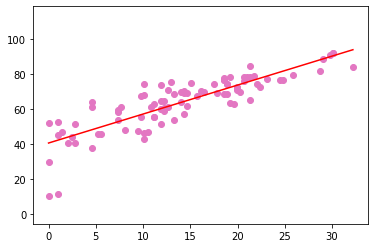

In [11]:
from matplotlib import pyplot as plt
from celluloid import Camera

def gradient_descent_naive(X, y): #벡터연산이 아니기 때문에 naive

    epochs = 100000
    min_grad = 0.0001
    learning_rate = 0.001
    
    m = 0.0
    c = 0.0
    
    n = len(y)
    #c, m의 초기값을 이렇게 정함
    c_grad = 0.0
    m_grad = 0.0
    
    #애니메이션 제작 준비
    fig = plt.figure()
    ax = fig.subplots()
    camera = Camera(fig)
    
    for epoch in range(epochs):
        
        for i in range(n):
            y_pred = m * X[i] + c
            m_grad += 2*(y_pred-y[i]) * X[i]
            c_grad += 2*(y_pred - y[i])

        c_grad /= n
        m_grad /= n
        
        #m, c값 업데이트
        m = m - learning_rate * m_grad 
        c = c - learning_rate * c_grad
        
        if ( epoch % 1000 == 0):
            y_pred = m*X + c
            
            plt.scatter(X, y)
            plt.plot([min(X), max(X)], [min(y_pred), max(y_pred)], color='red')
            
            print("epoch %d: m_grad=%f, c_grad=%f, m=%f, c=%f" %(epoch, m_grad, c_grad, m, c))
            camera.snap()
        
        if ( abs(m_grad) < min_grad and abs(c_grad) < min_grad ):
            break
        
    animation = camera.animate(interval = 70, blit =True)
    animation.save('hw5_1.gif')

    return m, c

start_time = time.time()
m, c = gradient_descent_naive(X, y)
end_time = time.time()

print("%f seconds" %(end_time - start_time))

print("\n\nFinal:")
print("gdn_m=%f, gdn_c=%f" %(m, c))
print("ls_m=%f, ls_c=%f" %(ls_m, ls_c) )



In [15]:
#이번엔 벡터화해서 연산 -> 속도가 더 빠름
def gradient_descent_vectorized(X, y):
    epochs = 100000
    min_grad = 0.0001
    learning_rate = 0.001
    
    m = 0.0
    c = 0.0
    
    n = len(y)
    
    c_grad = 0.0
    m_grad = 0.0

    for epoch in range(epochs):    
    
        y_pred = m * X + c #각 샘플에 따라 연산하는게 아닌 벡터로 한번에 연산 -> naive와의 가장 큰 차이!
        m_grad = (2*(y_pred - y)*X).sum()/n
        c_grad = (2 * (y_pred - y)).sum()/n
        
        m = m - learning_rate * m_grad
        c = c - learning_rate * c_grad        

        if ( epoch % 1000 == 0):
            print("epoch %d: m_grad=%f, c_grad=%f, m=%f, c=%f" %(epoch, m_grad, c_grad, m, c) )
    
        if ( abs(m_grad) < min_grad and abs(c_grad) < min_grad ):
            break

    return m, c

start_time = time.time()
m, c = gradient_descent_vectorized(X, y)
end_time = time.time()

print("%f seconds" %(end_time - start_time))

print("\n\nFinal:")
print("gdv_m=%f, gdv_c=%f" %(m, c) )
print("ls_m=%f, ls_c=%f" %(ls_m, ls_c) )


epoch 0: m_grad=-2010.578272, c_grad=-128.088261, m=2.010578, c=0.128088
epoch 1000: m_grad=0.638426, c_grad=-11.725729, m=3.044511, c=15.109091
epoch 2000: m_grad=0.403252, c_grad=-7.406372, m=2.532763, c=24.508185
epoch 3000: m_grad=0.254708, c_grad=-4.678118, m=2.209525, c=30.444975
epoch 4000: m_grad=0.160882, c_grad=-2.954860, m=2.005356, c=34.194855
epoch 5000: m_grad=0.101619, c_grad=-1.866391, m=1.876397, c=36.563407
epoch 6000: m_grad=0.064186, c_grad=-1.178876, m=1.794942, c=38.059466
epoch 7000: m_grad=0.040542, c_grad=-0.744619, m=1.743492, c=39.004428
epoch 8000: m_grad=0.025608, c_grad=-0.470327, m=1.710994, c=39.601299
epoch 9000: m_grad=0.016175, c_grad=-0.297074, m=1.690468, c=39.978302
epoch 10000: m_grad=0.010216, c_grad=-0.187642, m=1.677502, c=40.216431
epoch 11000: m_grad=0.006453, c_grad=-0.118521, m=1.669313, c=40.366841
epoch 12000: m_grad=0.004076, c_grad=-0.074862, m=1.664140, c=40.461845
epoch 13000: m_grad=0.002575, c_grad=-0.047285, m=1.660873, c=40.521853